In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import train_test_split

In [54]:
df1 = pd.read_csv("C:/Users/User/Documents/UNI/3rd year/semester 2/ML/Final Project/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [55]:
df1.shape

(13320, 9)

In [56]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [57]:
# Count the number of duplicate rows based on all columns
num_duplicates = df1.duplicated().sum()

# Display the number of duplicate rows
print("Number of duplicate rows based on all columns:", num_duplicates)

Number of duplicate rows based on all columns: 529


In [58]:
# Find duplicate rows
duplicate_rows = df1[df1.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                  area_type   availability          location       size  \
971    Super built-up  Area  Ready To Move      Haralur Road      3 BHK   
1115   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1143   Super built-up  Area  Ready To Move       Vittasandra      2 BHK   
1290   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1394   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
...                     ...            ...               ...        ...   
13285  Super built-up  Area  Ready To Move      VHBCS Layout      2 BHK   
13299  Super built-up  Area         18-Dec        Whitefield      4 BHK   
13311            Plot  Area  Ready To Move  Ramamurthy Nagar  7 Bedroom   
13313  Super built-up  Area  Ready To Move       Uttarahalli      3 BHK   
13319  Super built-up  Area  Ready To Move      Doddathoguru      1 BHK   

       society   total_sqft  bath  balcony  price  
971    NRowse          1464   3

In [59]:
# Remove all duplicate rows based on all columns
df1 = df1.drop_duplicates()

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df1.shape)

Shape of cleaned DataFrame: (12791, 9)


EDA

In [60]:
# Count the number of missing values in each column
missing_values = df1.isnull().sum()

# Display the number of missing values
print(missing_values)

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64


In [61]:
df1['society'].unique()
#Doesn't make sense and hence can be removed
df1.drop('society', axis=1, inplace=True)

In [62]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [63]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

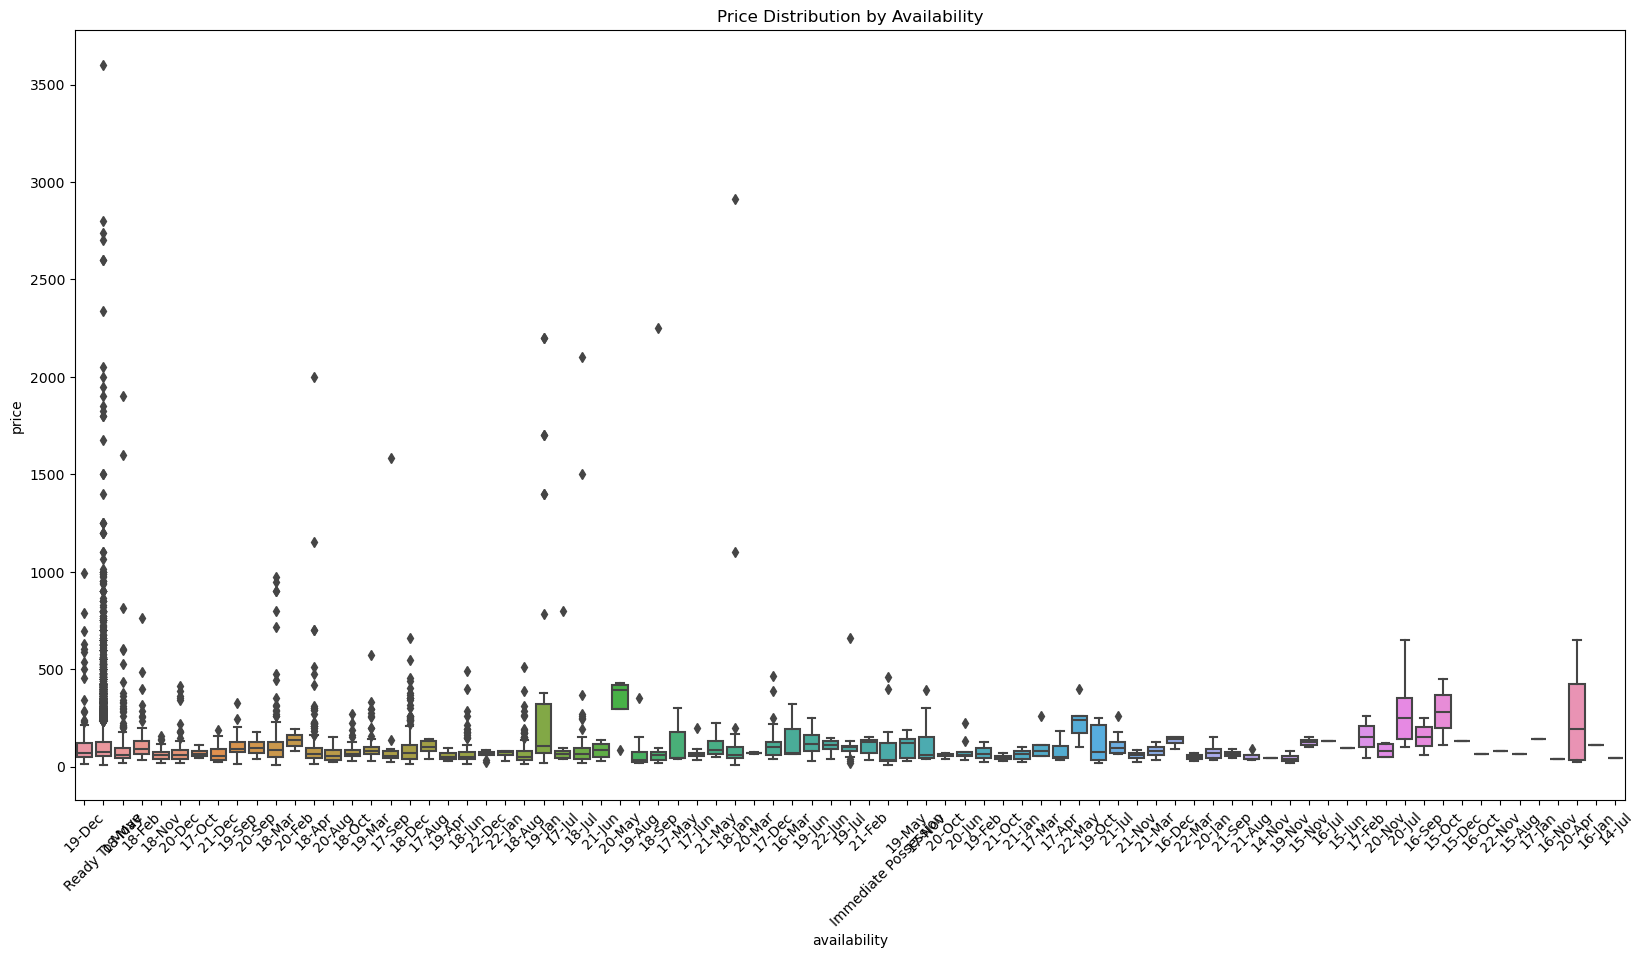

In [64]:
#Price VS availability
sns.boxplot(x='availability', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by Availability')

# Show the plot
plt.show()

In [65]:
#availability doesn't provide much information as we don't know the year. Hence can be removed
df1.drop('availability', axis=1, inplace=True)

In [66]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [67]:
area_type_freq=df1['area_type'].value_counts()
print(area_type_freq)

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64


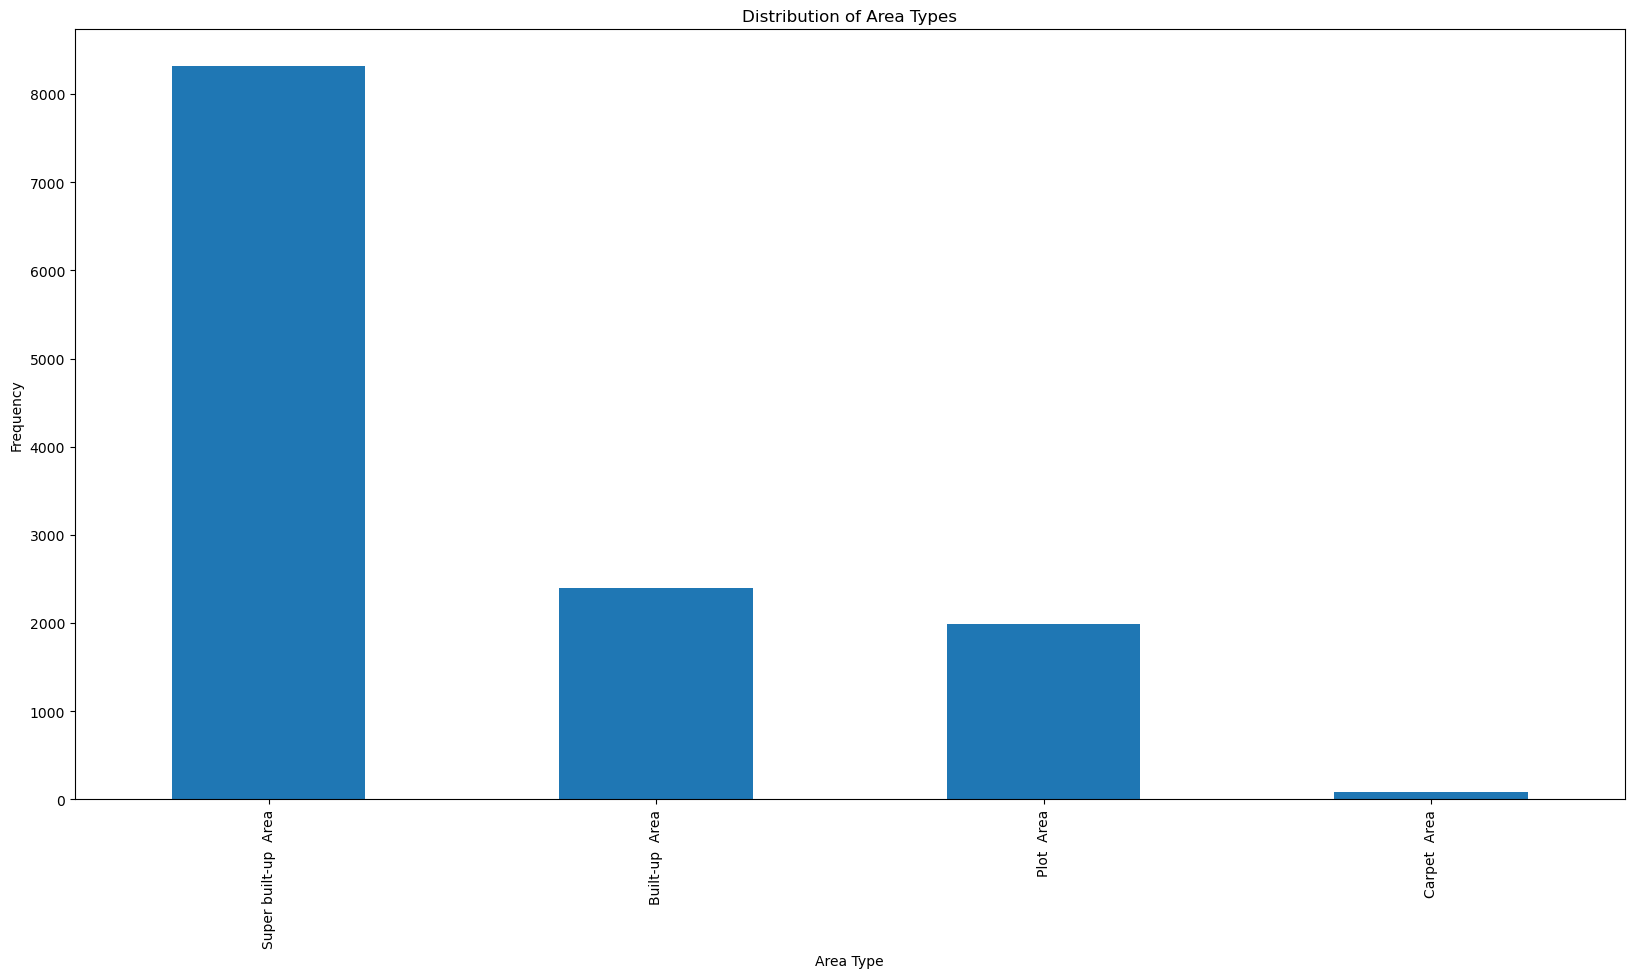

In [68]:
#Area Type
area_type_freq.plot(kind='bar')
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Frequency')
plt.show()

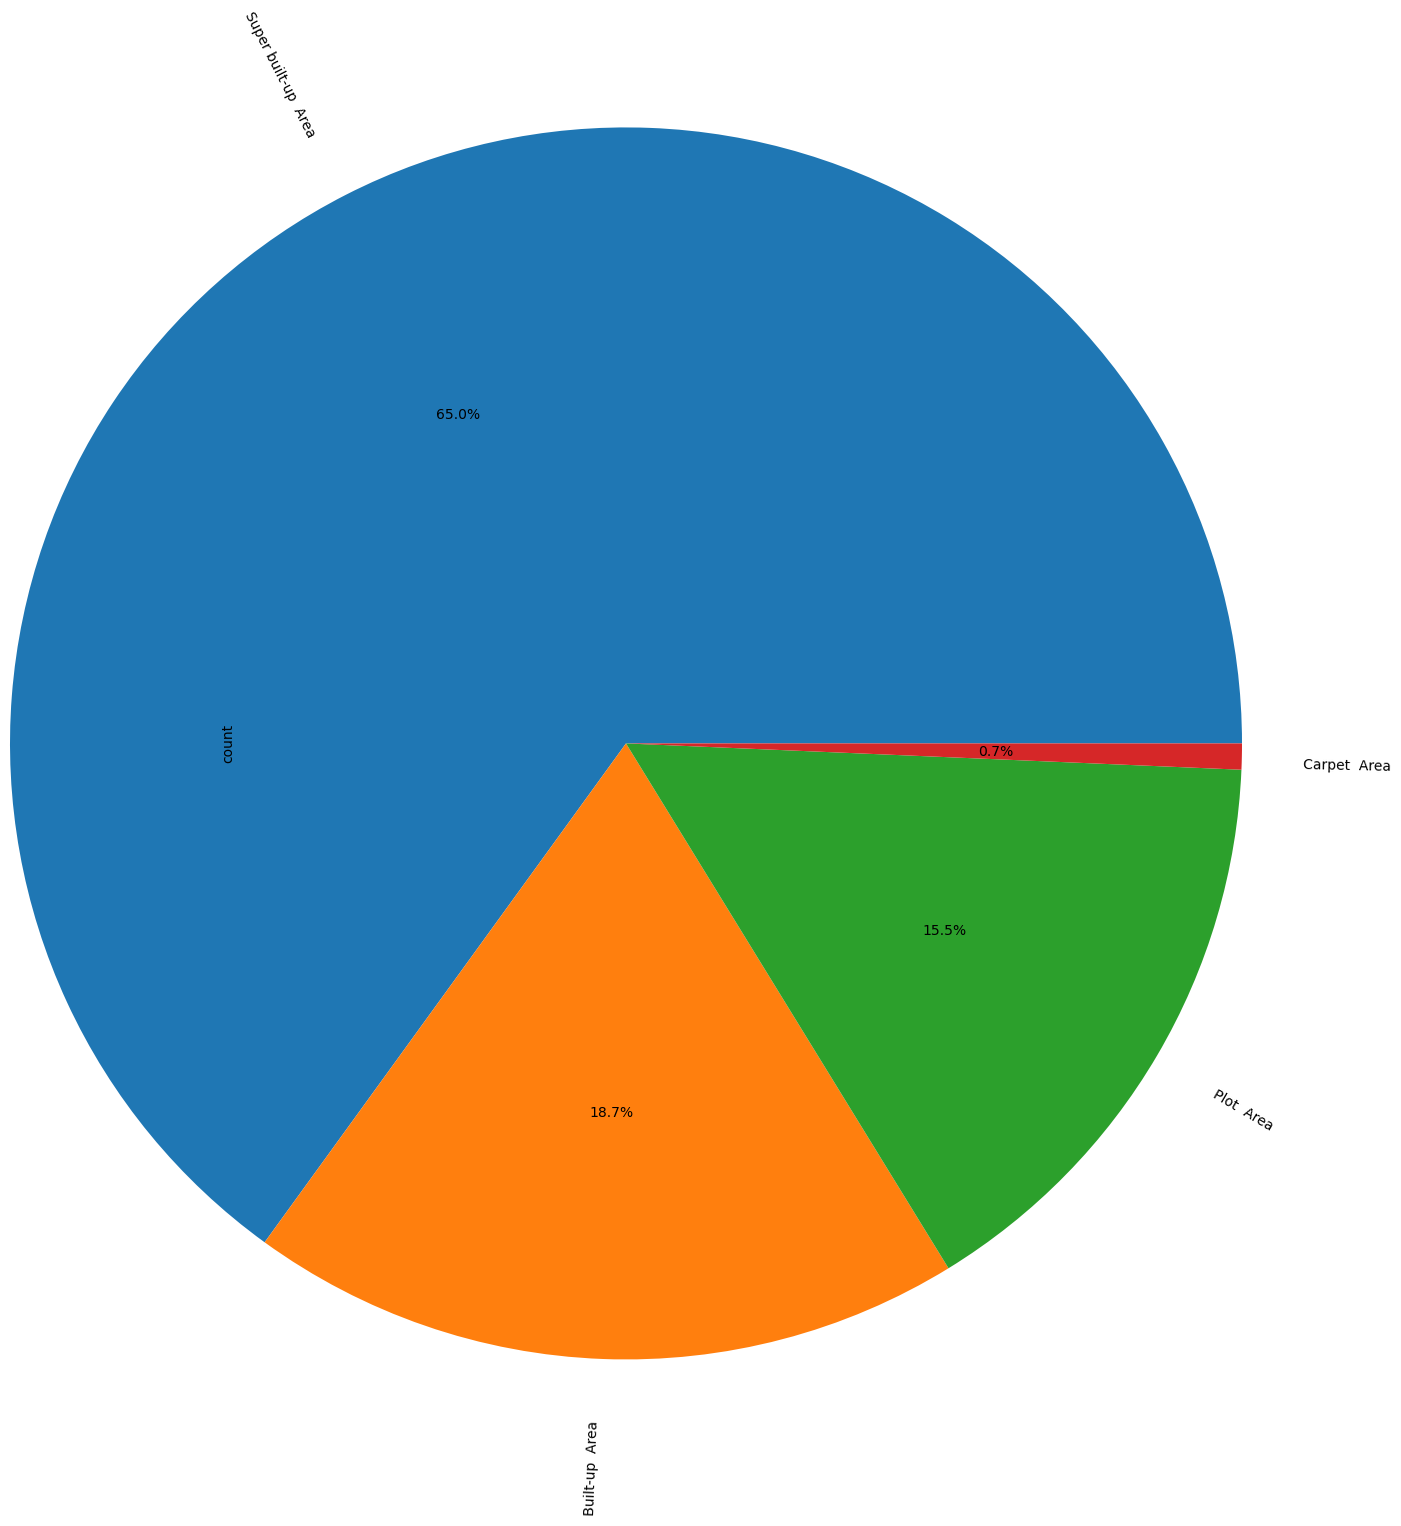

In [69]:
#Area Type
area_type_freq.plot.pie(
    autopct="%.1f%%",   # Display percentage values with one decimal place
    rotatelabels=True,  # Rotate labels to improve readability
    wedgeprops={'linewidth': 6},  # Set the width of the wedge outlines
    radius=2            # Increase the radius of the pie chart
)
plt.show()

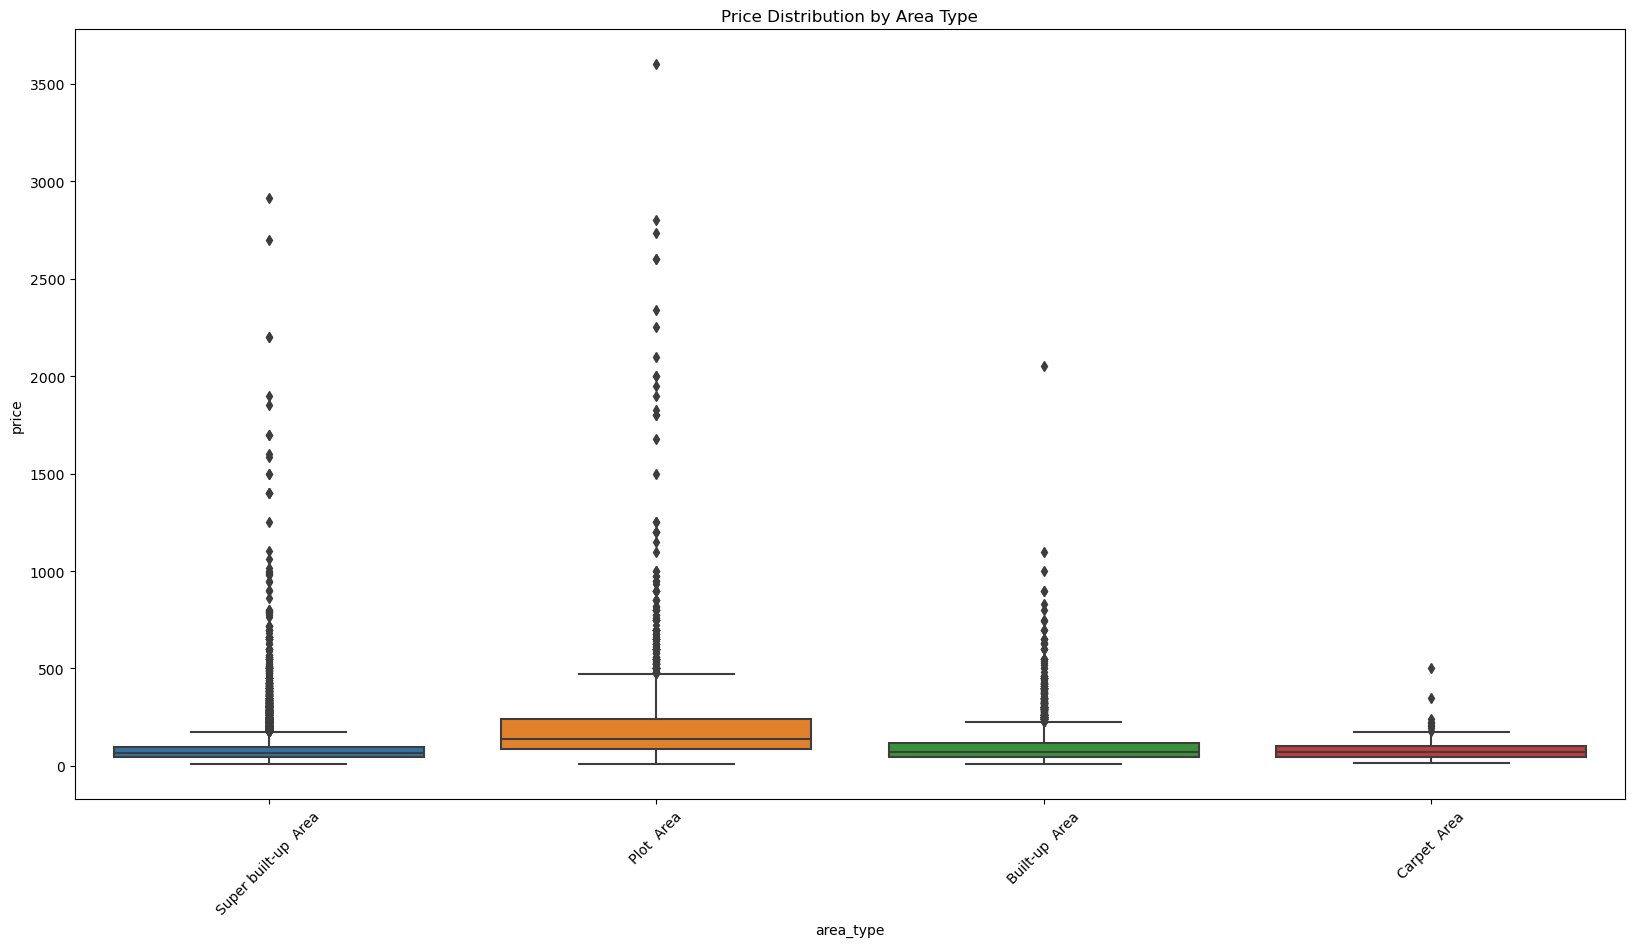

In [70]:
#Price VS Area_type 
sns.boxplot(x='area_type', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by Area Type')

# Show the plot
plt.show()

#Plot Area: The entire piece of land the house sits on
#Super Built-Up Area: Includes hallways, elevators, staircases, amenities (gyms, pools) that the entire building uses.(includes Built-Up Area)
#Built-up Area: Total area covered by the house structure itself (includes carpet area)
#Carpet Area: This is essentially the usable floor area  inside the house.

#Using this variable to predict price is not useful since generally people are not specifically looking at the price 
#of these different areas as when they buy they are usually paying for the square feet of 
#area and not for types of area

#Hence we can consider removing Area Type

In [71]:
# Remove column 'area_type' from the DataFrame
df1 = df1.drop(columns=['area_type'])
print(df1)

                       location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13316             Richards Town      4 BHK       3600   5.0      NaN  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00

[12791 rows x 6 columns]


In [72]:
# Count the number of missing values in each column
missing_values = df1.isnull().sum()

# Display the number of missing values
print(missing_values)

location        1
size           16
total_sqft      0
bath           73
balcony       605
price           0
dtype: int64


In [73]:
# Count the total number of records (rows) in the DataFrame
total_records = len(df1)

# Calculate the number of records with missing values
missing_records = df1.isnull().any(axis=1).sum()
print(missing_records)
# Calculate the percentage of missing records
percentage_missing_records = (missing_records / total_records) * 100

# Display the percentage of missing records
print(f"Percentage of missing records: {percentage_missing_records:.2f}%")

606
Percentage of missing records: 4.74%


In [74]:
# Remove rows with missing values
df1 = df1.dropna()

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df1)

Shape of cleaned DataFrame:                        location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13312                 Bellandur      2 BHK       1262   2.0      2.0   47.00
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00

[12185 rows x 6 columns]


In [75]:
df1.shape

(12185, 6)

In [76]:
#Location
unique_locations = df1['location'].unique()
num_unique_locations = len(unique_locations)
print("Number of unique locations:", num_unique_locations)
print("Unique locations:", unique_locations)

Number of unique locations: 1265
Unique locations: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [77]:
#cleaning of locations

# Remove leading and trailing whitespaces
df1['location'] = df1['location'].str.strip()

# Convert text to lowercase
df1['location'] = df1['location'].str.lower()

# Capitalize each word in the location
df1['location'] = df1['location'].str.title()

# Print the number of unique locations and unique locations after cleaning
unique_locations_cleaned = df1['location'].unique()
num_unique_locations_cleaned = len(unique_locations_cleaned)
print("Number of unique locations after cleaning:", num_unique_locations_cleaned)
print("Unique locations after cleaning:", unique_locations_cleaned)

Number of unique locations after cleaning: 1244
Unique locations after cleaning: ['Electronic City Phase Ii' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12Th Cross Srinivas Nagar Banshankari 3Rd Stage' 'Havanur Extension'
 'Abshot Layout']


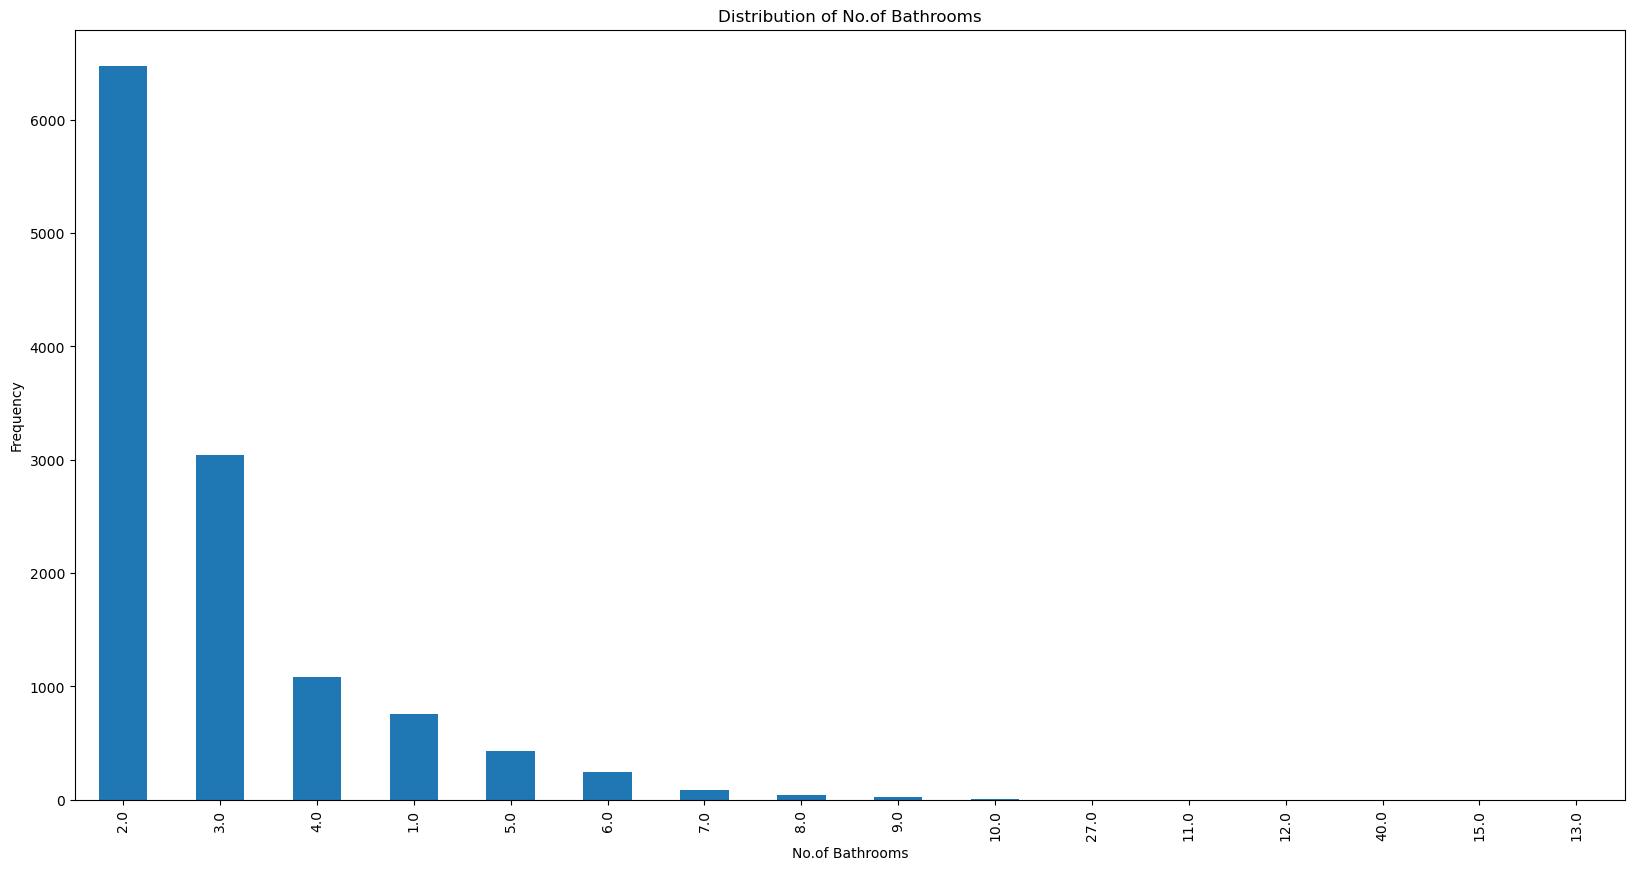

In [78]:
#Bath
bath_freq=df1.bath.value_counts()
bath_freq.plot(kind='bar')
plt.title('Distribution of No.of Bathrooms')
plt.xlabel('No.of Bathrooms')
plt.ylabel('Frequency')
plt.show()

In [79]:
# Convert 'bath' column to integer
df1['bath'] = df1['bath'].astype(int)

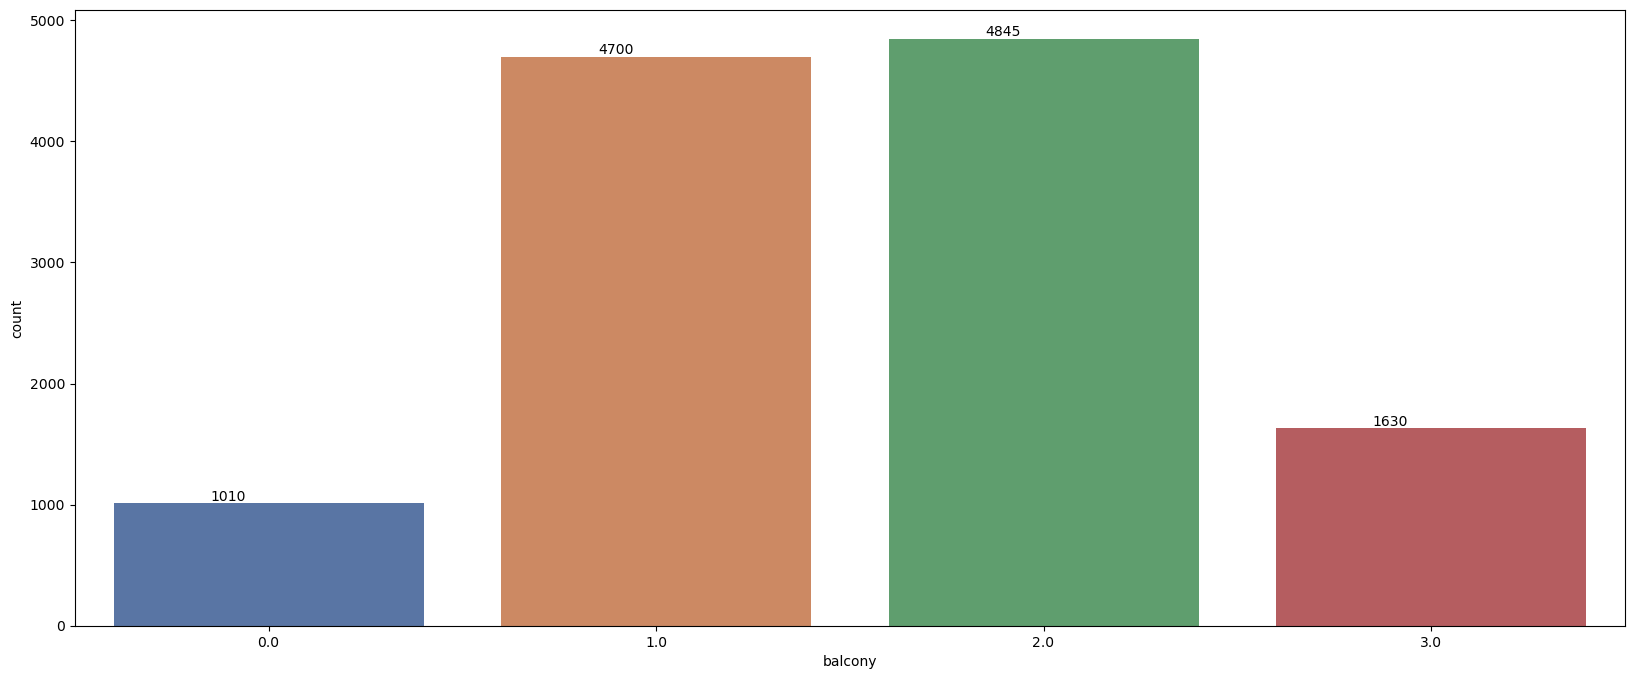

In [80]:
#Balcony
# Specify color palette
colors = sns.color_palette('deep', n_colors=len(df1['balcony'].unique()))

# Set figure size
plt.figure(figsize=(20, 8))

ax = sns.countplot(x='balcony', data=df1, palette=colors)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color='black')

# Show the plot
plt.show()

In [81]:
#SIZE
df1['size'].unique()
#1 BHK: One bedroom, one hall (living room), and one kitchen.
#2 BHK: Two bedrooms, one hall (living room), and one kitchen.
#3 BHK: Three bedrooms, one hall (living room), and one kitchen.

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [82]:
#Create new variable bedroom to indicate number of bedroom
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.bedroom.unique()
# Create new variable 'bedroom' to indicate the number of bedrooms


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

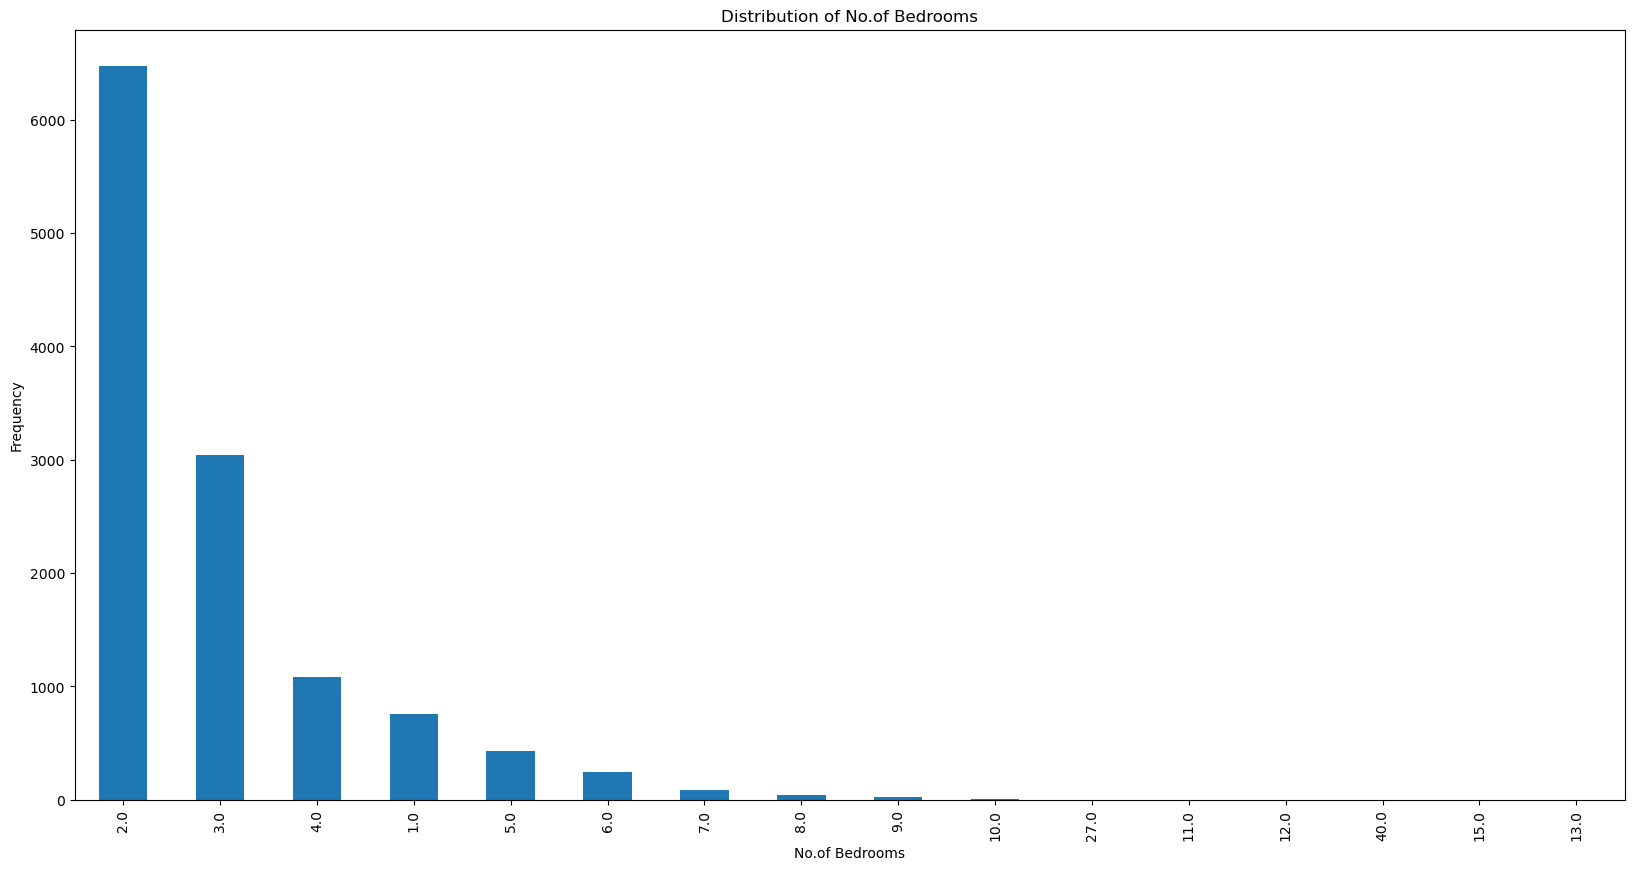

In [83]:
#Bedroom
bedroom_freq=df1.bedroom.value_counts()
bath_freq.plot(kind='bar')
plt.title('Distribution of No.of Bedrooms')
plt.xlabel('No.of Bedrooms')
plt.ylabel('Frequency')
plt.show()

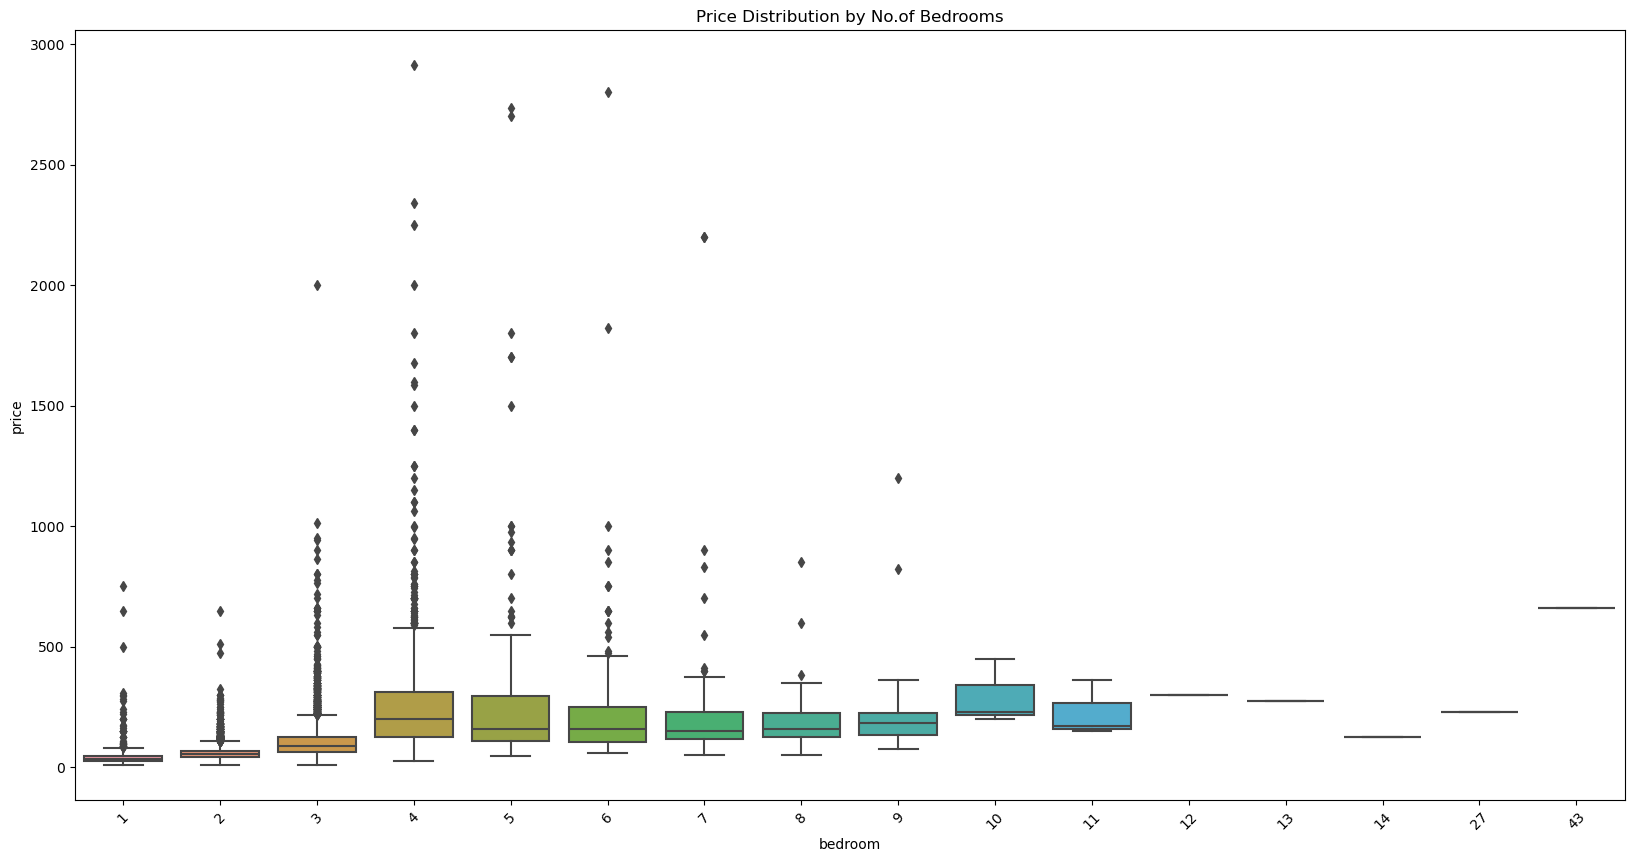

In [84]:
#Price VS Bedroom
sns.boxplot(x='bedroom', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by No.of Bedrooms')

# Show the plot
plt.show()

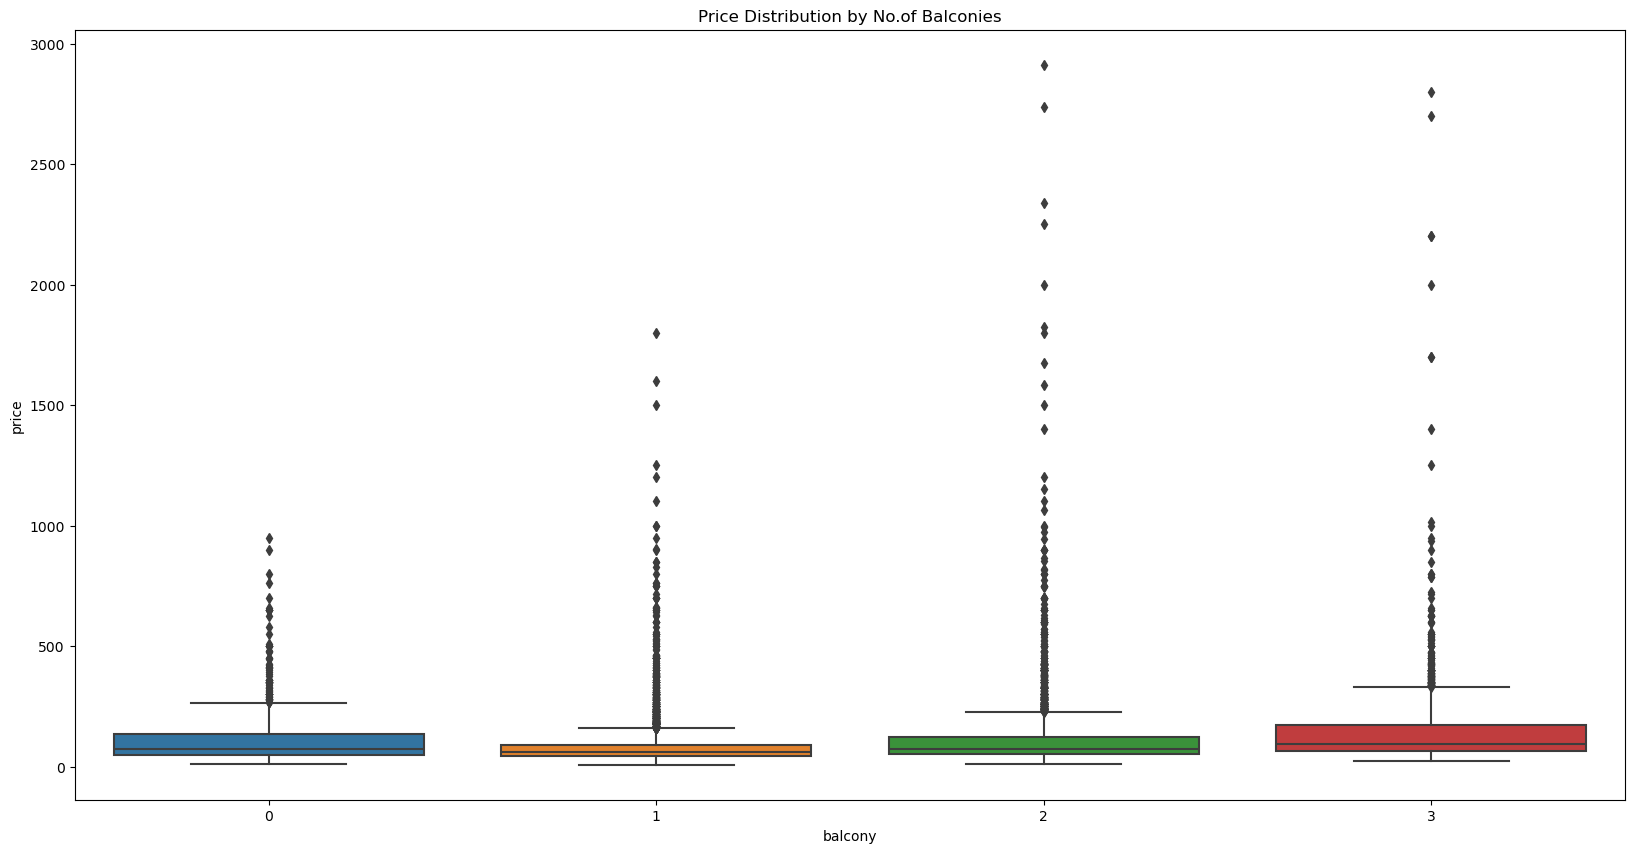

In [85]:
df1['balcony'] = df1['balcony'].astype(int)
#Price VS Balcony
sns.boxplot(x='balcony', y='price', data=df1)


# Set plot title
plt.title('Price Distribution by No.of Balconies')

# Show the plot
plt.show()

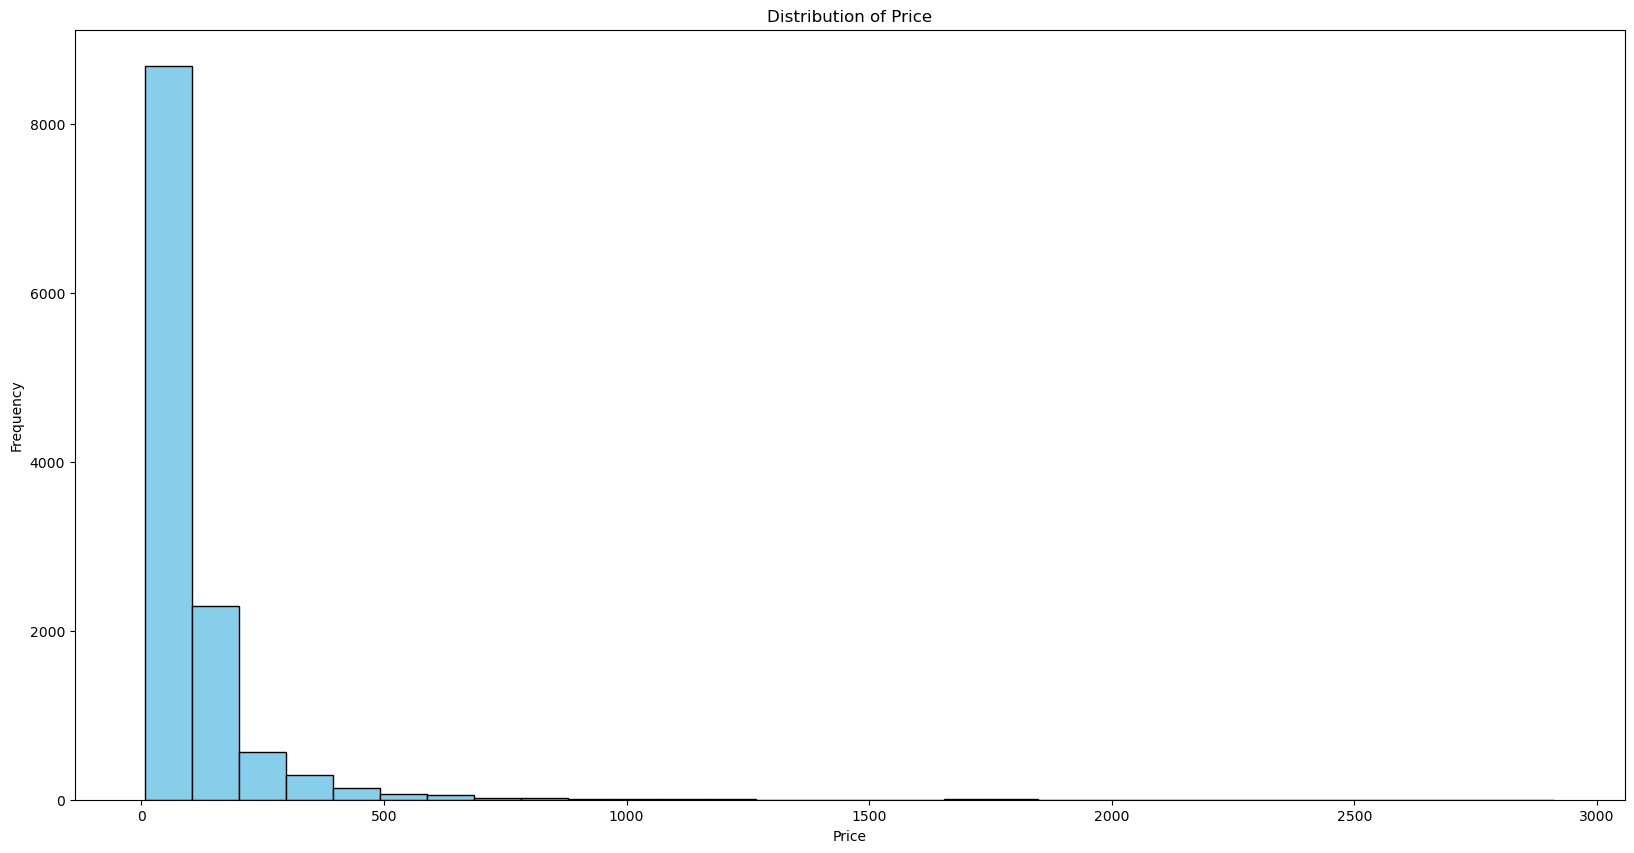

In [86]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'price' column
plt.hist(df1['price'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Show the plot
plt.show()

In [87]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [88]:
def convert_to_sqft(total_sqft):
    try:
        # First, check if the value is a range
        if '-' in total_sqft:
            range_values = total_sqft.split('-')
            avg_sqft = (float(range_values[0]) + float(range_values[1])) / 2
            return avg_sqft
        # If the value contains 'Sq. Yards', convert to square feet (1 Sq. Yard = 9 Sq. Feet)
        elif 'Sq. Yards' in total_sqft:
            return float(total_sqft.split('Sq. Yards')[0]) * 9
        # If the value contains 'Grounds', convert to square feet (1 Grounds = 2400 Sq. Feet)
        elif 'Grounds' in total_sqft:
            return float(total_sqft.split('Grounds')[0]) * 2400
        # If the value contains 'Guntha', convert to square feet (1 Guntha = 1089 Sq. Feet)
        elif 'Guntha' in total_sqft:
            return float(total_sqft.split('Guntha')[0]) * 1089
        # If the value contains 'Acres', convert to square feet (1 Acres = 43560 Sq. Feet)
        elif 'Acres' in total_sqft:
            return float(total_sqft.split('Acres')[0]) * 43560
        # If the value contains 'Sq. Meter', convert to square feet (1 Sq. Meter = 10.764 Sq. Feet)
        elif 'Sq. Meter' in total_sqft:
            return float(total_sqft.split('Sq. Meter')[0]) * 10.764
        else:
            return float(total_sqft)
    except:
        return np.nan  # return NaN for invalid values


In [89]:
# Define a function to round numbers to two decimal places without scientific notation
def round_to_two_decimal_places(x):
    return round(x, 2)

# Apply the conversion function to the 'total_sqft' column
df1['total_sqft'] = df1['total_sqft'].apply(convert_to_sqft)

# Round the converted values to two decimal places
df1['total_sqft'] = df1['total_sqft'].apply(round_to_two_decimal_places)

# Print unique values after conversion
print("Unique values in 'total_sqft' after conversion:")
print(df1['total_sqft'].unique())

Unique values in 'total_sqft' after conversion:
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


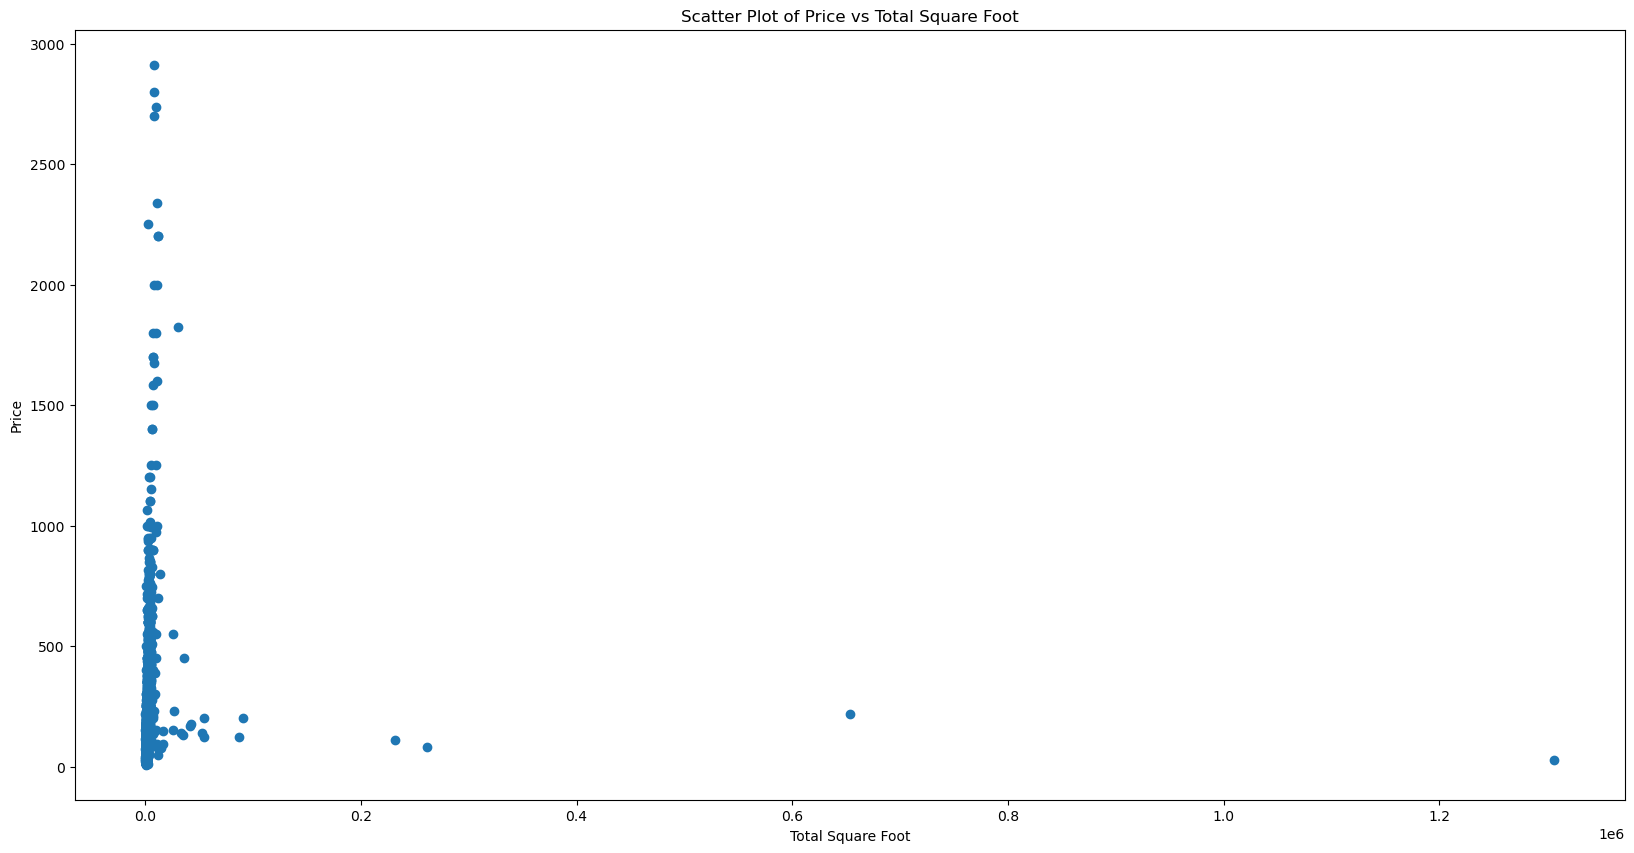

In [90]:
plt.scatter(df1['total_sqft'], df1['price'])
plt.xlabel('Total Square Foot')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Total Square Foot')
plt.show()

In [91]:
df1.shape

#From 13320 we have reduced to 12185. 

(12185, 7)

In [92]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase Ii,2 BHK,1056.0,2,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,4
2,Uttarahalli,3 BHK,1440.0,2,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,3
4,Kothanur,2 BHK,1200.0,2,1,51.00,2


In [93]:
# Remove column 'size' from the DataFrame
df1 = df1.drop(columns=['size'])
print(df1)

                       location  total_sqft  bath  balcony   price  bedroom
0      Electronic City Phase Ii      1056.0     2        1   39.07        2
1              Chikka Tirupathi      2600.0     5        3  120.00        4
2                   Uttarahalli      1440.0     2        3   62.00        3
3            Lingadheeranahalli      1521.0     3        1   95.00        3
4                      Kothanur      1200.0     2        1   51.00        2
...                         ...         ...   ...      ...     ...      ...
13312                 Bellandur      1262.0     2        2   47.00        2
13314         Green Glen Layout      1715.0     3        3  112.00        3
13315                Whitefield      3453.0     4        0  231.00        5
13317     Raja Rajeshwari Nagar      1141.0     2        1   60.00        2
13318           Padmanabhanagar      4689.0     4        1  488.00        4

[12185 rows x 6 columns]


In [94]:
df1.head()

,location,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase Ii,1056.0,2,1,39.07,2
1,Chikka Tirupathi,2600.0,5,3,120.00,4
2,Uttarahalli,1440.0,2,3,62.00,3
3,Lingadheeranahalli,1521.0,3,1,95.00,3
4,Kothanur,1200.0,2,1,51.00,2


In [95]:
# Specify the features (X) and target variable (y)
X = df1.drop(columns=['price'])  # Drop the target column to get features
y = df1['price']  # Target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9748, 5)
Shape of X_test: (2437, 5)
Shape of y_train: (9748,)
Shape of y_test: (2437,)


#MORE CLEANING (Outlier Removal)

In [96]:
location_stats = X_train['location'].value_counts(ascending=False)
location_stats

location
Whitefield                              399
Sarjapur  Road                          286
Electronic City                         241
Kanakpura Road                          190
Thanisandra                             182
                                       ... 
Rto Ullalu                                1
Arudi                                     1
Whietfield,                               1
Jagajyothi Layout                         1
Kengeri Satellite Town Khb Apartment      1
Name: count, Length: 1148, dtype: int64

In [97]:
len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Benson Town                             10
Judicial Layout                         10
Murugeshpalya                           10
1St Block Koramangala                   10
Sector 2 Hsr Layout                     10
                                        ..
Rto Ullalu                               1
Arudi                                    1
Whietfield,                              1
Jagajyothi Layout                        1
Kengeri Satellite Town Khb Apartment     1
Name: count, Length: 955, dtype: int64

In [98]:
X_train.location = X_train.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(X_train.location.unique())

194

In [99]:
# Find locations in test data that are not present in training data
test_locations_not_in_train = set(X_test['location']) - set(X_train['location'])

# Identify locations in test data that are in the 'other' category in training data
test_locations_to_other = set(X_test['location']) - set(location_stats.index)

# Update those locations in the test data to 'other'
X_test.loc[X_test['location'].isin(test_locations_not_in_train.union(test_locations_to_other)), 'location'] = 'other'

# Check the unique locations in the updated test data
print("Unique locations in updated test data:", len(X_test['location'].unique()))

Unique locations in updated test data: 188


In [100]:
# Concatenate training and test data to ensure consistent encoding
combined_data = pd.concat([X_train, X_test])
# Perform one-hot encoding on the combined 'location' column
combined_data_encoded = pd.get_dummies(combined_data, columns=['location'], drop_first=True)

# Remove 'location_' from column names
combined_data_encoded.columns = combined_data_encoded.columns.str.replace('location_', '')

# Split the combined data back into training and test sets
X_train_encoded = combined_data_encoded.iloc[:len(X_train)]
X_test_encoded = combined_data_encoded.iloc[len(X_train):]


In [101]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.
#8 such records can be removed
# Concatenate training_X and training_y into a single DataFrame
training_data = pd.concat([X_train_encoded, y_train], axis=1)
training_data =training_data.drop(training_data[training_data.bath > training_data.bedroom + 2].index)

In [102]:
training_data.shape

(9741, 198)

In [103]:
#normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
#If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
#We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft
#655 records are removed
training_data = training_data [~(training_data .total_sqft/training_data .bedroom < 300)]

In [104]:
training_data .shape

(9231, 198)

In [105]:
#Price(in rupees) per square feet
training_data ["price_per_sqft"] = training_data ["price"]*100000/training_data ["total_sqft"]
training_data .head()

,total_sqft,bath,balcony,bedroom,1St Phase Jp Nagar,2Nd Stage Nagarbhavi,5Th Phase Jp Nagar,6Th Phase Jp Nagar,7Th Phase Jp Nagar,8Th Phase Jp Nagar,...,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,price,price_per_sqft
12332,3000.0,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,240.00,8000.000000
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,225.00,6081.081081
12991,1367.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,80.00,5852.231163
11721,1580.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,66.85,4231.012658
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,39.50,3787.152445


In [106]:
training_data ['price_per_sqft'].describe()

#max and min are way different. Also don't make sense

count      9229.000000
mean       6210.536761
std        3986.573207
min           2.257423
25%        4225.352113
50%        5294.117647
75%        6852.925672
max      176470.588235
Name: price_per_sqft, dtype: float64

In [107]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers based on price_per_sqft column
training_data  = remove_outliers_iqr(training_data , 'price_per_sqft')

training_data .shape
#756 records were removed

(8500, 199)

In [108]:
training_data ['price_per_sqft'].describe()

count     8500.000000
mean      5389.501847
std       1722.336362
min        367.309458
25%       4142.857143
50%       5108.924092
75%       6393.339735
max      10789.473684
Name: price_per_sqft, dtype: float64

In [109]:
training_data=training_data.drop(columns=['price_per_sqft'])

In [110]:
training_data.head()

,total_sqft,bath,balcony,bedroom,1St Phase Jp Nagar,2Nd Stage Nagarbhavi,5Th Phase Jp Nagar,6Th Phase Jp Nagar,7Th Phase Jp Nagar,8Th Phase Jp Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,price
12332,3000.0,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,240.00
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,225.00
12991,1367.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,80.00
11721,1580.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,66.85
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,39.50


In [111]:
y_train = training_data['price']
X_train_encoded = training_data.drop(columns=['price'])

In [112]:
# Make log transformation
y_train_log=np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [113]:
X_train_encoded.head()

,total_sqft,bath,balcony,bedroom,1St Phase Jp Nagar,2Nd Stage Nagarbhavi,5Th Phase Jp Nagar,6Th Phase Jp Nagar,7Th Phase Jp Nagar,8Th Phase Jp Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
12332,3000.0,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12991,1367.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11721,1580.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
# Check data types of columns in X_train_encoded
print(X_train_encoded.dtypes)

total_sqft            float64
bath                    int32
balcony                 int32
bedroom                 int64
1St Phase Jp Nagar       bool
                       ...   
Yelachenahalli           bool
Yelahanka                bool
Yelahanka New Town       bool
Yeshwanthpur             bool
other                    bool
Length: 197, dtype: object


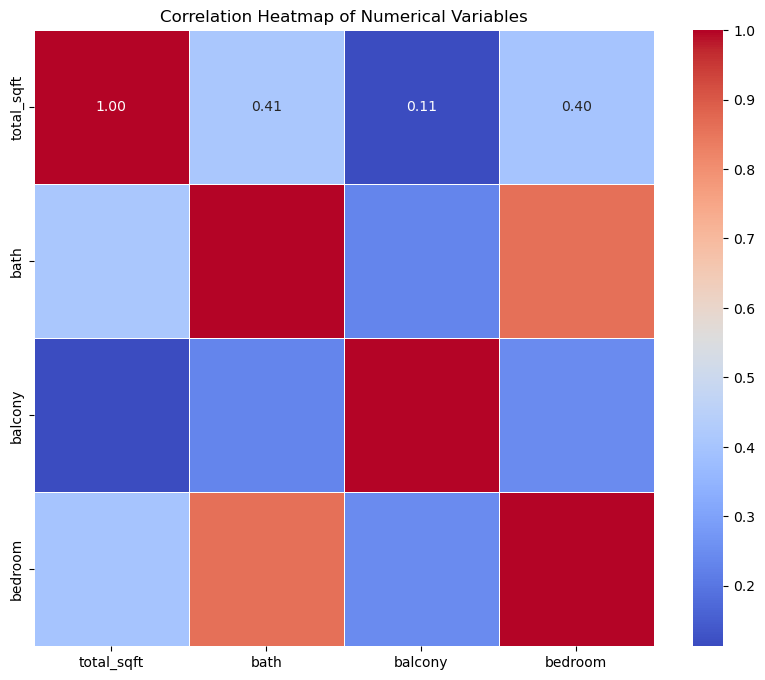

In [115]:
#CHECKING CORRELATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert X_train_scaled_cleaned to a DataFrame
X_train_df = pd.DataFrame(X_train_encoded)

# Select only the numerical variables from the DataFrame
numerical_variables = X_train_df[['total_sqft', 'bath', 'balcony', 'bedroom']]

# Calculate the correlation matrix
correlation_matrix = numerical_variables.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data
X_test_scaled = scaler.transform(X_test_encoded)

In [117]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_clf = LinearRegression()

# Fit the model on the scaled training data
lr_clf.fit(X_train_scaled, y_train_log)

# Evaluate the model on the scaled test data
score = lr_clf.score(X_test_scaled, y_test_log)
print("R-squared score on test data:", score)

R-squared score on test data: -3.3462161921805123e+18


In [120]:
!pip install xgboost

#XGBOOST(without tuning)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Create an instance of XGBRegressor with default parameters
xgb_model_default = XGBRegressor()

# Fit the model
xgb_model_default.fit(X_train_scaled, y_train_log)

# Print the score (negative mean squared error)
score_default = xgb_model_default.score(X_test_scaled, y_test_log)
print("Score for XGBoost (Default):", score_default)

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 162.5 kB/s eta 0:10:14
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.1/99.8 MB 174.3 kB/s eta 0:09:33
   ---------------------------------------- 0.1/99.8 MB 174.3 kB/s eta 0:09:33
   ---------------------------------------- 0.1/99.8 MB 218.6 kB/s eta 0:07:36
   ---------------------------------------- 0.1/99.8 MB 300.4 kB/s eta 0:05:32
   ---------------------------------------- 0.1/99.8 MB 302.7 kB/s eta 0:05:30
   ---------------------------------------- 0.2/99.8 MB 316.5 kB/s eta 0:05:15
   ---------------------------------------- 0.2/99.8 MB 377.1 kB/s eta 0:04:25


In [ ]:
#RIDGE REGRESSION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


param_grid_ridge = {
    'alpha': [0.1, 1, 10],
}
ridge_model_tuned = Ridge()
grid_search_ridge = GridSearchCV(ridge_model_tuned, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train_log)
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge Regression:", best_params_ridge)
print("Best score for Ridge Regression:", best_score_ridge)

ridge_model_best = Ridge(**best_params_ridge)
ridge_model_best.fit(X_train_scaled, y_train_log)

In [ ]:
# Predictions on the training set
ridge_train_predictions = ridge_model_best.predict(X_train_scaled)
# Training MSE
ridge_train_mse = mean_squared_error(y_train_log, ridge_train_predictions)
# Predictions on the test set
ridge_test_predictions = ridge_model_best.predict(X_test_scaled)
# Test MSE
ridge_test_mse = mean_squared_error(y_test_log, ridge_test_predictions)
# RMSE for training predictions
ridge_train_rmse = mean_squared_error(y_train_log, ridge_train_predictions, squared=False)
# RMSE for test predictions
ridge_test_rmse = mean_squared_error(y_test_log, ridge_test_predictions, squared=False)
# MAE for training predictions
ridge_train_mae = mean_absolute_error(y_train_log, ridge_train_predictions)
# MAE for test predictions
ridge_test_mae = mean_absolute_error(y_test_log, ridge_test_predictions)
# R^2 for training predictions
ridge_train_r2 = r2_score(y_train_log, ridge_train_predictions)
# R^2 for test predictions
ridge_test_r2 = r2_score(y_test_log, ridge_test_predictions)
# Difference between train and test MSE
ridge_mse_difference= ridge_train_mse - ridge_test_mse

print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Train R^2:", ridge_train_r2)
print("Ridge Regression Test R^2:", ridge_test_r2)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

In [121]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
X_train_encoded.columns

Index(['total_sqft', 'bath', 'balcony', 'bedroom', '1St Phase Jp Nagar',
       '2Nd Stage Nagarbhavi', '5Th Phase Jp Nagar', '6Th Phase Jp Nagar',
       '7Th Phase Jp Nagar', '8Th Phase Jp Nagar',
       ...
       'Varthur Road', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur', 'other'],
      dtype='object', length=197)

In [123]:
X_train_encoded.head(10)

,total_sqft,bath,balcony,bedroom,1St Phase Jp Nagar,2Nd Stage Nagarbhavi,5Th Phase Jp Nagar,6Th Phase Jp Nagar,7Th Phase Jp Nagar,8Th Phase Jp Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
12332,3000.0,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12991,1367.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11721,1580.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6737,1140.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
430,1194.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12400,1520.0,2,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11262,1615.0,3,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11209,1750.0,3,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
def predict_price(location, sqft, bath, balcony, bedroom):
    loc_index = np.where(X_train_encoded.columns == location)[0][0]

    x = np.zeros(len(X_train_encoded.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return xgb_model.predict([x])[0]

In [125]:
predict_price('2Nd Stage Nagarbhavi',1000, 2, 3, 2)

29.23314

In [126]:
predict_price('2Nd Stage Nagarbhavi',5000, 3, 3, 10)

817.281

In [127]:
predict_price('Indira Nagar',1000, 2, 2, 2)

73.7696

In [128]:
predict_price('Indira Nagar',1000, 3, 2, 4)

101.90722

In [ ]:
import pickle
with open('newbangalore_house_prices_model.pickle','wb') as f:
    pickle.dump(xgb_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_train_encoded.columns]
}
with open("newcolumns.json","w") as f:
    f.write(json.dumps(columns))